In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading Data
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Split data into Features and Target
x = data[['YearsExperience']].values  # Feature
y = data['Salary'].values  # Target

In [4]:
# Split data into Training and Testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=9014) 

In [5]:
xtest

array([[ 3.2],
       [ 7.9],
       [ 2. ],
       [ 3.9],
       [10.3],
       [ 9.5]])

In [6]:
# Build The model
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
# train the model
model.fit(xtrain,ytrain)

LinearRegression()

In [9]:
ypred = model.predict(xtest)
ypred

array([ 56182.55053157, 100294.69682063,  44919.8748833 ,  62752.44465973,
       122820.04811718, 115311.59768499])

In [10]:
ytest

array([ 54445., 101302.,  43525.,  63218., 122391., 116969.])

In [11]:
xtest

array([[ 3.2],
       [ 7.9],
       [ 2. ],
       [ 3.9],
       [10.3],
       [ 9.5]])

In [12]:
# Evaluation of Model
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.99842716176972

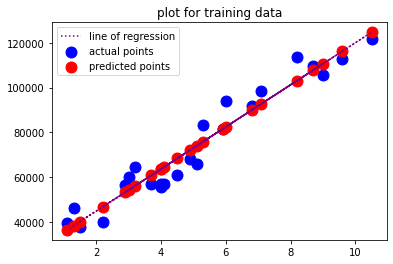

<Figure size 1080x720 with 0 Axes>

In [13]:
# plot for Training
plt.scatter(xtrain,ytrain,color='blue',s=120,label='actual points')
plt.scatter(xtrain,model.predict(xtrain),color='red',s=120,label='predicted points')
plt.plot(xtrain,model.predict(xtrain),color='purple',label='line of regression',linestyle='dotted')
plt.legend()
plt.title("plot for training data")
plt.figure(figsize=(15,10))
plt.show()

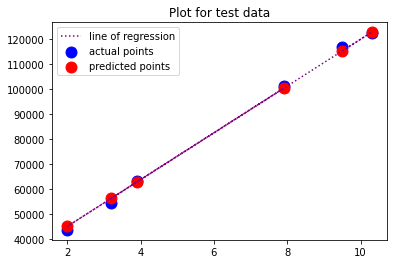

<Figure size 1080x720 with 0 Axes>

In [14]:
# plot for Testing
plt.scatter(xtest,ytest,color='blue',s=120,label='actual points')
plt.scatter(xtest,model.predict(xtest),color='red',s=120,label='predicted points')
plt.plot(xtest,model.predict(xtest),color='purple',label='line of regression',linestyle='dotted')
plt.legend()
plt.title("Plot for test data")
plt.figure(figsize=(15,10))
plt.show()

## for finding best r2_score 

In [15]:
scores = []
for i in range(0,20000):
  xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x,y,train_size=0.8,random_state=i)
  model1 = LinearRegression()
  model.fit(xtrain1,ytrain1)
  ypred1 = model.predict(xtest1)
  r2_1 = r2_score(ytest1,ypred1)
  scores.append(r2_1)  

In [16]:
np.max(scores)

0.99842716176972

In [17]:
np.argmax(scores) #random state value where model is more accurate

9014

In [18]:
Exp = float(input("Enter years of Experience: "))
salary = model.predict([[Exp]])
print(round(salary[0],2))

Enter years of Experience: 5.5
77997.76
